
     
<img src="https://upload.wikimedia.org/wikipedia/commons/d/db/Logo_ITESO_normal.jpg" alt="Smiley face" height="210" width="210">

### ISRAEL CASTILLO HERRERA
### IF708348


In [79]:
# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

In [80]:
#importar los paquetes que se van a usar
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
%matplotlib inline
#algunas opciones para Pandas
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

In [81]:
TSLA = web.YahooOptions('TSLA')
TSLA_O = TSLA.get_all_data().reset_index()
TSLA_O.set_index('Expiry')

,Strike,Type,Symbol,...,Quote_Time,Last_Trade_Date,JSON
Expiry,,,,,,,
2020-06-19,5.0,put,TSLA200619P00005000,...,2019-11-27 21:00:01,2019-11-19 20:59:01,"{'contractSymbol': 'TSLA200619P00005000', 'str..."
2020-09-18,5.0,put,TSLA200918P00005000,...,2019-11-27 21:00:01,2019-11-19 18:06:40,"{'contractSymbol': 'TSLA200918P00005000', 'str..."
2021-01-15,5.0,call,TSLA210115C00005000,...,2019-11-27 21:00:01,2019-11-14 20:05:15,"{'contractSymbol': 'TSLA210115C00005000', 'str..."
2021-01-15,5.0,put,TSLA210115P00005000,...,2019-11-27 21:00:01,2019-11-26 14:30:00,"{'contractSymbol': 'TSLA210115P00005000', 'str..."
2021-03-19,5.0,call,TSLA210319C00005000,...,2019-11-27 21:00:01,2019-10-23 18:30:24,"{'contractSymbol': 'TSLA210319C00005000', 'str..."
...,...,...,...,...,...,...,...
2020-06-19,690.0,put,TSLA200619P00690000,...,2019-11-27 21:00:01,2019-07-24 15:29:00,"{'contractSymbol': 'TSLA200619P00690000', 'str..."
2021-01-15,690.0,call,TSLA210115C00690000,...,2019-11-27 21:00:01,2019-11-27 19:59:21,"{'contractSymbol': 'TSLA210115C00690000', 'str..."
2021-01-15,690.0,put,TSLA210115P00690000,...,2019-11-27 21:00:01,2019-11-22 14:58:56,"{'contractSymbol': 'TSLA210115P00690000', 'str..."


In [82]:
TSLA_O.loc[0]
TSLA_O.loc[0, 'JSON']

{'contractSymbol': 'TSLA200619P00005000',
 'strike': 5.0,
 'currency': 'USD',
 'lastPrice': 0.01,
 'change': 0.0,
 'percentChange': 0.0,
 'volume': 215,
 'openInterest': 365,
 'bid': 0.01,
 'ask': 0.08,
 'contractSize': 'REGULAR',
 'expiration': 1592524800,
 'lastTradeDate': 1574197141,
 'impliedVolatility': 2.0468798828125,
 'inTheMoney': False}

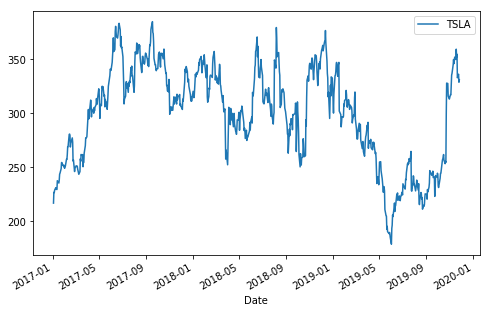

In [83]:
ticker = ['TSLA']
start_date = '2017-01-01'

CLOSES_TSLA = get_adj_closes(ticker, start_date)
CLOSES_TSLA.plot(figsize=(8,5));
plt.legend(ticker);

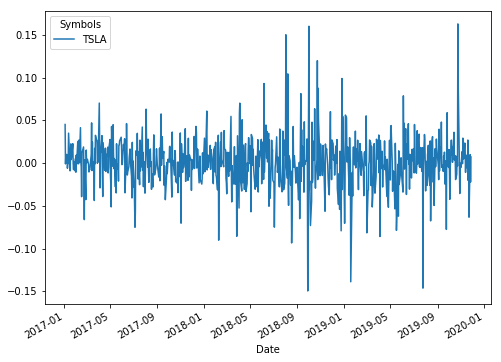

In [84]:
def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).iloc[1:]

RET_TSLA = calc_daily_ret(CLOSES_TSLA)
RET_TSLA.plot(figsize=(8,6));

In [85]:
indice_opt = msft_opt.loc[(TSLA_O.Type=='put') & (TSLA_O.Strike==140) & (TSLA_O.Expiry=='2021-01-15')]
indice_opt

,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
466,140.0,2021-01-15,put,...,2019-11-27 21:00:01,2019-11-26 17:34:38,"{'contractSymbol': 'TSLA210115P00140000', 'str..."


In [86]:
i_opt= indice_opt.index
opcion_valuar = TSLA_O.loc[i_opt[0]]
opcion_valuar['JSON']
print('Precio del activo subyacente actual = ',opcion_valuar.Underlying_Price)

Precio del activo subyacente actual =  331.29


### RENDIMIENTO SIMPLE Y LOGARÍTMICO

In [87]:
# Descargamos los precios de apple
ticker = ['TSLA']
start_date = '2017-01-01'
CLOSES_TSLA = get_adj_closes(ticker, start_date)
CLOSES_TSLA

Symbols,TSLA
Date,
2017-01-03,216.99
2017-01-04,226.99
2017-01-05,226.75
2017-01-06,229.01
2017-01-09,231.28
...,...
2019-11-21,354.83
2019-11-22,333.04
2019-11-25,336.34


In [88]:
# Obtenemos el rendimiento simple
Ri = CLOSES_TSLA.pct_change(1).iloc[1:]
# Obtenemos su media y desviación estándar de los rendimientos
mu_R = Ri.mean()[0]
sigma_R = Ri.std()[0]
Ri

Symbols,TSLA
Date,
2017-01-04,0.046
2017-01-05,-0.001
2017-01-06,0.010
2017-01-09,0.010
2017-01-10,-0.006
...,...
2019-11-21,0.007
2019-11-22,-0.061
2019-11-25,0.010


In [89]:
ndays = 422
nscen = 10
dates = pd.date_range(start='2019-11-21', end='2021-01-15')
#len (dates)

dt = 1; # Rendimiento diario 
Z = np.random.randn(ndays,nscen)  # Z ~ N(0,1)
# Simulación normal de los rendimientos
Ri_dt = pd.DataFrame(mu_R*dt+Z*sigma_R*np.sqrt(dt),index=dates)
Ri_dt.cumprod()

,0,1,2,...,7,8,9
2019-11-21,4.925e-03,-2.958e-02,-1.594e-02,...,1.233e-02,-5.880e-02,3.564e-02
2019-11-22,-6.507e-05,-6.049e-04,-4.535e-04,...,1.243e-04,1.344e-03,-5.350e-04
2019-11-23,-2.129e-06,-3.859e-06,4.922e-06,...,3.088e-06,-1.919e-05,1.449e-05
2019-11-24,-6.936e-09,-6.633e-08,1.029e-07,...,3.220e-08,8.794e-07,2.806e-07
2019-11-25,3.675e-11,3.241e-09,-2.601e-09,...,5.020e-11,-2.926e-08,-1.587e-08
...,...,...,...,...,...,...,...
2021-01-11,0.000e+00,-0.000e+00,-0.000e+00,...,-0.000e+00,0.000e+00,-0.000e+00
2021-01-12,0.000e+00,-0.000e+00,0.000e+00,...,0.000e+00,-0.000e+00,0.000e+00
2021-01-13,0.000e+00,-0.000e+00,0.000e+00,...,0.000e+00,-0.000e+00,0.000e+00
2021-01-14,-0.000e+00,-0.000e+00,0.000e+00,...,0.000e+00,0.000e+00,0.000e+00


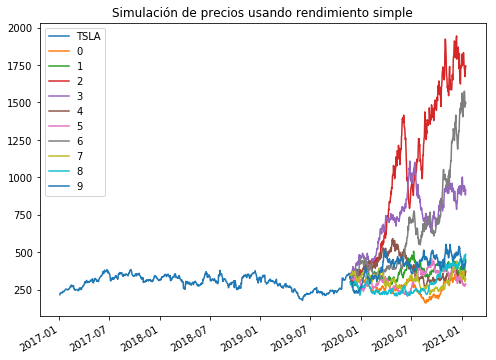

In [90]:
# Simulación del precio
S_0 = CLOSES_TSLA.iloc[-1,0]
S_T = S_0*(1+Ri_dt).cumprod()

# Se muestran los precios simulados con los precios descargados
pd.concat([CLOSES_TSLA,S_T]).plot(figsize=(8,6));
plt.title('Simulación de precios usando rendimiento simple');

4.086380458817035

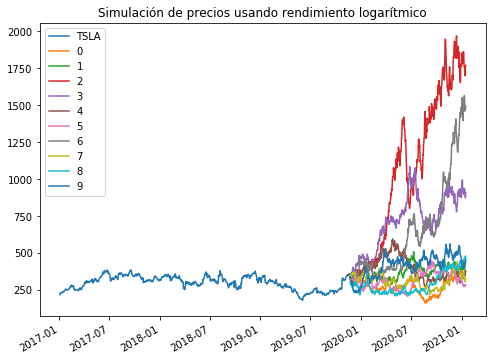

In [91]:
ri = calc_daily_ret(CLOSES_TSLA)
# Usando la media y desviación estándar de los rendimientos logarítmicos
mu_r = ri.mean()[0]
sigma_r = ri.std()[0]

# # Usando la equivalencia teórica
# mu_r2 = mu_R - (sigma_R**2)/2

sim_ret_ri = pd.DataFrame(mu_r*dt+Z*sigma_r*np.sqrt(dt), index=dates)

# Simulación del precio
S_0 = CLOSES_TSLA.iloc[-1,0]
S_T2 = S_0*np.exp(sim_ret_ri.cumsum())

# Se muestran los precios simulados con los precios descargados
pd.concat([CLOSES_TSLA,S_T2]).plot(figsize=(8,6));
plt.title('Simulación de precios usando rendimiento logarítmico');

# from sklearn.metrics import mean_absolute_error
e1 = np.abs(S_T-S_T2).mean().mean()
e1

In [92]:
print('Rendimientos LOG Y SIMPLE')
sigma_R,sigma_r

Rendimientos LOG Y SIMPLE


(0.030866950397950274, 0.03073231456576879)

### MODELO NORMAL

In [93]:
mu = RET_TSLA.mean()[0]
sigma = RET_TSLA.std()[0]

# Tasa de bonos de 1 yr de fecha 11/01/19 -> 1.53%
r = 0.0153/360 # Tasa diaria

mu, sigma, r

(0.0005788547957256338, 0.03073231456576879, 4.2499999999999996e-05)

In [94]:
ndays = 422
nscen = 10
dates = pd.date_range(start='2019-11-14', periods = ndays)
#dates

sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r, index=dates)
sim_ret.cumsum()
# Las columnas son los escenarios y las filas son las días de contrato

,0,1,2,...,7,8,9
2019-11-14,-0.012,-0.004,0.032,...,0.026,0.020,0.010
2019-11-15,-0.023,-0.011,0.053,...,0.053,0.020,-0.027
2019-11-16,-0.045,0.020,0.072,...,0.078,0.002,-0.023
2019-11-17,-0.063,0.045,0.079,...,0.082,-0.046,-0.069
2019-11-18,-0.126,0.064,0.104,...,0.121,-0.053,-0.106
...,...,...,...,...,...,...,...
2021-01-04,-0.471,1.098,0.003,...,0.997,-0.342,0.525
2021-01-05,-0.478,1.080,0.008,...,1.016,-0.276,0.515
2021-01-06,-0.455,1.053,0.016,...,0.998,-0.273,0.520
2021-01-07,-0.459,1.027,-0.003,...,1.014,-0.275,0.497


In [95]:
S0 = CLOSES_TSLA.iloc[-1,0]  # Condición inicial del precio a simular
sim_closes = S0*np.exp(sim_ret.cumsum())
sim_closes

,0,1,2,...,7,8,9
2019-11-14,327.283,329.809,341.999,...,340.035,337.932,334.750
2019-11-15,323.809,327.693,349.390,...,349.341,337.875,322.370
2019-11-16,316.662,338.088,355.900,...,358.219,331.852,323.902
2019-11-17,310.972,346.540,358.666,...,359.527,316.455,309.300
2019-11-18,291.958,353.091,367.766,...,373.793,314.131,297.935
...,...,...,...,...,...,...,...
2021-01-04,206.790,993.223,332.161,...,897.410,235.351,559.846
2021-01-05,205.505,975.324,334.033,...,915.267,251.470,554.442
2021-01-06,210.276,949.294,336.506,...,898.672,252.180,557.466
2021-01-07,209.312,924.967,330.134,...,912.840,251.649,544.608


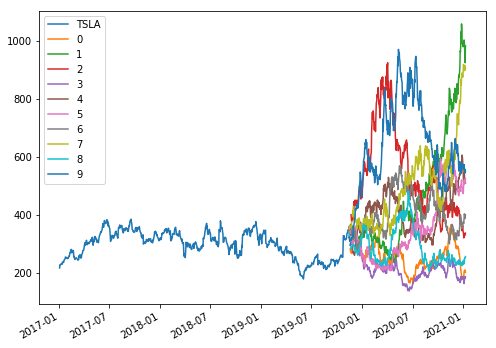

In [96]:
# Se muestran los precios simulados con los precios descargados
pd.concat([CLOSES_TSLA,sim_closes]).plot(figsize=(8,6));

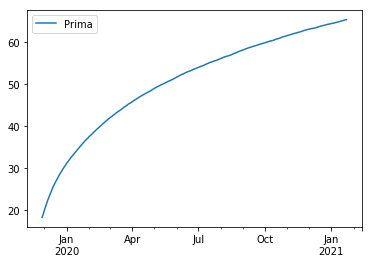

In [128]:
from datetime import date
Hoy = date.today()
K=350  # strike price
ndays = 422 
nscen = 100000
dates = pd.date_range(start= Hoy, periods = ndays)
S0 = CLOSES_TSLA.iloc[-1,0]  # Condición inicial del precio a simular

sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)
sim_closes = S0*np.exp(sim_ret.cumsum())
#strike = pd.DataFrame({'Strike':K*np.ones(ndays)}, index=dates)
#simul = pd.concat([closes_aapl.T,strike.T,sim_closes.T]).T
#simul.plot(figsize=(8,6),legend=False);

strike = pd.DataFrame(K*np.ones([ndays,nscen]), index=dates)
put = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(strike-sim_closes,np.zeros([ndays,nscen])).mean(axis=1)}, index=dates)
put.plot();


In [129]:
print("La prima es: ", put.iloc[-1])

La prima es:  Prima    65.303
Name: 2021-01-22 00:00:00, dtype: float64


In [130]:
confianza = 0.99
sigma_est = sim_closes.iloc[-1].sem()
mean_est = put.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i1)

(62.95761559938102, 67.6486328044588)
(62.95761559938102, 67.6486328044588)


### REDUCCIÓN DE VARIANZA

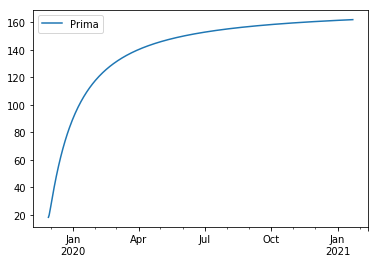

In [134]:

K=350
# Usando muestreo estratificado----> #estratros = nscen
U = (np.arange(0,nscen)+np.random.rand(ndays,nscen))/nscen
Z = st.norm.ppf(U)

sim_ret2 = pd.DataFrame(sigma*Z+r,index=dates)
sim_closes2 = S0*np.exp(sim_ret2.cumsum())

# Función de pago
strike = pd.DataFrame(K*np.ones([ndays,nscen]), index=dates)
put = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(strike-sim_closes2,np.zeros([ndays,nscen])).T.mean()}, index=dates)
put.plot();

In [135]:
print("La prima es: ", put.iloc[-1])

La prima es:  Prima    161.765
Name: 2021-01-22 00:00:00, dtype: float64


In [136]:
confianza = 0.99
sigma_est = sim_closes2.iloc[-1].sem()
mean_est = put.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i2)
print('Valor de la opción',opcion_valuar.Last)

(-1.4561877989190826e+23, 1.4561877989190826e+23)
(-1.4561600040640143e+23, 1.4561600040640143e+23)
Valor de la opción 7.2


### REND

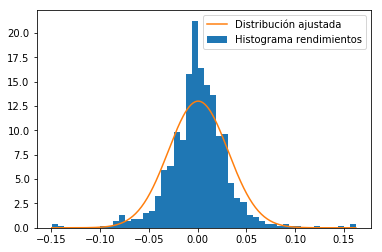

In [137]:
ren = calc_daily_ret(CLOSES_TSLA) # rendimientos 
y,x,des = plt.hist(ren['TSLA'],bins=50,density=True,label='Histograma rendimientos')

mu_fit,sd_fit = st.norm.fit(ren) # Se ajustan los parámetros de una normal
# Valores máximo y mínimo de los rendiemientos a generar
ren_max = max(x);ren_min = min(x)
# Vector de rendimientos generados
ren_gen = np.arange(ren_min,ren_max,0.001)
# Generación de la normal ajustado con los parámetros encontrados
curve_fit = st.norm.pdf(ren_gen,loc=mu_fit,scale=sd_fit)
plt.plot(ren_gen,curve_fit,label='Distribución ajustada')
plt.legend()
plt.show()


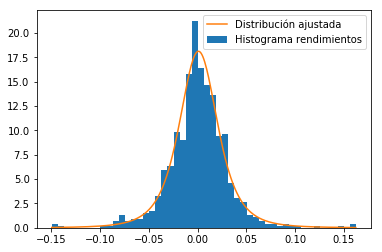

In [138]:
ren = calc_daily_ret(CLOSES_TSLA) # rendimientos 
y,x,des = plt.hist(ren['TSLA'],bins=50,density=True,label='Histograma rendimientos')

dof,mu_fit,sd_fit = st.t.fit(ren) # Se ajustan los parámetros de una normal
# Valores máximo y mínimo de los rendiemientos a generar
# ren_max = max(x);ren_min = min(x)
# Vector de rendimientos generados
ren_gen = np.arange(ren_min,ren_max,0.001)
# Generación de la normal ajustado con los parámetros encontrados
curve_fit = st.t.pdf(ren_gen,df=dof,loc=mu_fit,scale=sd_fit)
plt.plot(ren_gen,curve_fit,label='Distribución ajustada')

plt.legend()
plt.show()

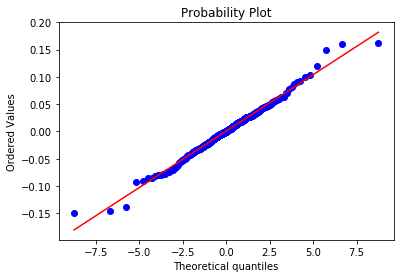

In [139]:
st.probplot(ren['TSLA'],sparams= dof, dist='t', plot=plt);

### HISTOGRAMA DE RENDIMIENTOS

In [140]:
ndays = 422 
nscen = 10

prob = y/np.sum(y)
values = x[1:]

ret = np.random.choice(values, ndays*nscen, p=prob)
dates = pd.date_range(start=Hoy,periods=ndays)
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_ret_hist

,0,1,2,...,7,8,9
2019-11-28,-5.981e-03,2.667e-04,-0.075,...,1.901e-02,-2.472e-02,-5.981e-03
2019-11-29,1.276e-02,2.667e-04,0.013,...,-5.981e-03,3.151e-02,-1.223e-02
2019-11-30,2.667e-04,1.901e-02,0.013,...,2.667e-04,1.901e-02,5.025e-02
2019-12-01,2.667e-04,-5.981e-03,-0.006,...,3.775e-02,2.667e-04,6.514e-03
2019-12-02,-1.848e-02,-5.981e-03,0.056,...,2.667e-04,3.151e-02,2.667e-04
...,...,...,...,...,...,...,...
2021-01-18,-2.472e-02,2.667e-04,0.007,...,2.667e-04,3.775e-02,3.151e-02
2021-01-19,2.526e-02,-5.981e-03,0.013,...,-1.223e-02,-5.981e-03,-2.472e-02
2021-01-20,2.526e-02,1.276e-02,-0.037,...,2.526e-02,1.901e-02,3.151e-02
2021-01-21,2.667e-04,3.151e-02,0.013,...,-3.097e-02,4.400e-02,-3.097e-02


In [141]:
sim_closes_hist = (CLOSES_TSLA.iloc[-1,0])*np.exp(sim_ret_hist.cumsum())
sim_closes_hist

,0,1,2,...,7,8,9
2019-11-28,329.314,331.378,307.443,...,337.648,323.200,329.314
2019-11-29,333.544,331.467,311.391,...,335.635,333.544,325.312
2019-11-30,333.633,337.828,315.391,...,335.724,339.945,342.076
2019-12-01,333.722,335.814,313.510,...,348.641,340.036,344.312
2019-12-02,327.613,333.811,331.732,...,348.734,350.920,344.403
...,...,...,...,...,...,...,...
2021-01-18,1006.363,1064.571,3381.773,...,1191.283,1473.224,1051.351
2021-01-19,1032.104,1058.223,3425.208,...,1176.804,1464.439,1025.676
2021-01-20,1058.505,1071.814,3300.066,...,1206.905,1492.544,1058.505
2021-01-21,1058.787,1106.120,3342.452,...,1170.098,1559.683,1026.223


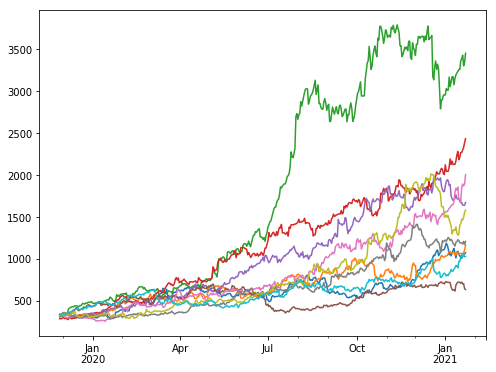

In [142]:
sim_closes_hist.plot(figsize=(8,6),legend=False);

Text(0.5, 1.0, 'Simulación usando el histograma de los rendimientos')

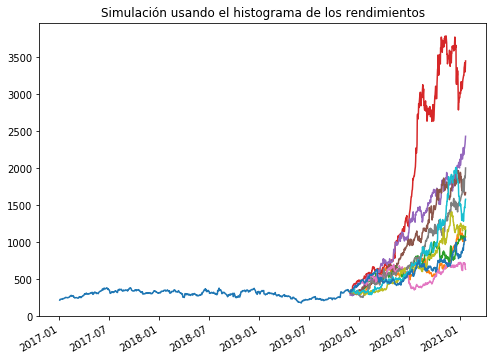

In [143]:
pd.concat([CLOSES_TSLA,sim_closes_hist]).plot(figsize=(8,6),legend=False);
plt.title('Simulación usando el histograma de los rendimientos')

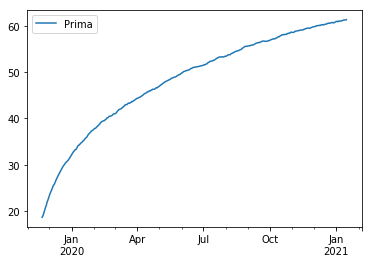

In [144]:
K=350
ndays = 422
nscen = 10000
freq, values = np.histogram(RET_TSLA+r-mu, bins=2000)
prob = freq/np.sum(freq)
ret=np.random.choice(values[1:],ndays*nscen,p=prob)
dates=pd.date_range('2019-11-21',periods=ndays)
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_closes_hist = (CLOSES_TSLA.iloc[-1,0])*np.exp(sim_ret_hist.cumsum())

strike = pd.DataFrame(K*np.ones(ndays*nscen).reshape((ndays,nscen)), index=dates)
put_hist = pd.DataFrame({'Prima':np.exp(-r*ndays)*np.fmax(strike-sim_closes_hist,np.zeros(ndays*nscen).reshape((ndays,nscen))).T.mean()}, index=dates)
put_hist.plot();

In [145]:
put_hist.iloc[-1]

Prima    61.377
Name: 2021-01-15 00:00:00, dtype: float64

In [146]:
confianza = 0.95
sigma_est = sim_closes_hist.iloc[-1].sem()
mean_est = put_hist.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i1)

(55.57192079955982, 67.18116218956344)
(55.57192079955982, 67.18116218956344)
